Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 

### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 16. Beginning Deep Learning - Classification, Tensorflow

This post is part of my beginning machine learning series. 
The series includes the following:aq


### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [6]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# In the notebooks on Pandas, Matplotlib and Scaling
# we loaded our dataset such as
#   04 - Beginning Pandas 
#   05 - Beginning Matplotlib
#   06 - Beginning Data Scaling
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [8]:
# Drop the port column
df_conn = df_conn.drop(columns=['id.resp_p'], inplace=False)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,0.000000,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [9]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) \
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  \
                                & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) \
                                    & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
7,0.054294,208,977,6,528,6,1297,0
8,0.424980,227,791633,176,9387,174,367737,0
9,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


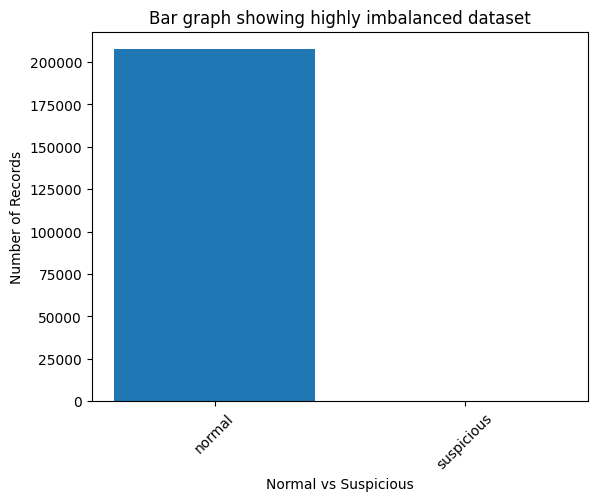

In [10]:
# The graph below shows this dataset is highly imbalanced.
# As a result, using measures like accuracy is more than likely not the best approach, to 
# understand how well our eventual model has "learned" via the training data
plt.title('Bar graph showing highly imbalanced dataset')
plt.bar(x=['normal', 'suspicious'], height=[ df_conn[df_conn.label == 0].shape[0], \
                                            df_conn[df_conn.label == 1].shape[0] ])
plt.ylabel(ylabel='Number of Records')
plt.xlabel(xlabel='Normal vs Suspicious')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Getting the percentage of samples that are considered suspicious in this dataset
# This is going to be quite a challenge for this learning algorithm
(df_conn[df_conn.label == 1].shape[0] / df_conn.shape[0]) * 100

0.032272359446649454

In [12]:
# Extract the X_data
X_data = df_conn.drop(columns=['label'], inplace=False)
X_data

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [13]:
# Extract the labels
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [14]:
# prepare to split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data.values, y_label, test_size=0.2, \
                                                    train_size=0.8, stratify=y_label, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [16]:
# With a statistical understanding of the normal and suspicious datasets, time to build the model
# Scaling was covered in 
#   06 - Beginning Data Scaling
# Scaling the data first
# import the scaler library
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the training data
min_max_scaler.fit(X_train)

# Transform the train data
X_train = min_max_scaler.transform(X_train)
X_train

array([[2.63072563e-07, 9.18795041e-08, 7.10178687e-08, ...,
        3.59579942e-07, 1.75013957e-06, 3.05765612e-07],
       [3.61672231e-07, 5.89415687e-08, 2.38314996e-08, ...,
        2.75234030e-07, 1.75013957e-06, 1.34744168e-07],
       [2.79225614e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       ...,
       [1.68135854e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [1.65133428e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [3.49932746e-07, 7.80108997e-08, 8.38868784e-08, ...,
        3.24065874e-07, 1.75013957e-06, 3.52407824e-07]])

In [18]:
# Scale the test data
X_test = min_max_scaler.transform(X_test)
X_test

array([[1.73484676e-05, 3.90054499e-07, 8.33234064e-04, ...,
        7.60578166e-05, 6.94805411e-04, 1.16707452e-03],
       [5.08070521e-07, 6.41422953e-08, 5.29059290e-08, ...,
        2.88551805e-07, 1.75013957e-06, 2.40121018e-07],
       [4.43809598e-06, 2.05948775e-06, 1.84884774e-05, ...,
        9.69534066e-06, 5.60044664e-05, 6.65187043e-05],
       ...,
       [5.47522398e-07, 6.41422953e-08, 8.96064383e-08, ...,
        2.88551805e-07, 1.75013957e-06, 3.73137696e-07],
       [1.83147984e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.95094010e-07, 0.00000000e+00, 0.00000000e+00]])

In [19]:
# Import PCA to leverage dimensionality reduction
# PCA was covered in notebook
#   07 - Beginning Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

In [20]:
# Setup PCA to use 3 principal Components
pca = PCA(n_components=3, random_state=10)
pca

PCA(n_components=3, random_state=10)

In [21]:
# Fit on the X_train
pca.fit(X_train)

# transform the training data
X_train = pca.transform(X_train)
X_train

array([[-0.00025828, -0.00023497, -0.00047665],
       [-0.00025839, -0.00023502, -0.00047653],
       [-0.00025846, -0.00023515, -0.00047686],
       ...,
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025826, -0.00023494, -0.00047657]])

In [22]:
# Use the opportunity to PCA transform the X_test
X_test = pca.transform(X_test)
X_test

array([[ 0.00134937,  0.000691  , -0.0008094 ],
       [-0.00025832, -0.00023494, -0.0004764 ],
       [-0.00018612, -0.00015918, -0.0004979 ],
       ...,
       [-0.00025824, -0.00023488, -0.00047639],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025896, -0.0002359 , -0.00047662]])

In [23]:
# In this notebook, I'm using  the Sequential API. In the autonencoder anomaly detection notebook, 
# we used model subclassing. In another I will use the  Functional API
#   12. Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow
#   14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
#   18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 

In [25]:
# Import tensorflow
import tensorflow as tf

In [26]:
# Set the random seed
# This is needed for reproducibility 
tf.keras.utils.set_random_seed(seed=10)

# Setup the model using the Sequential Class
tf_clf_model = tf.keras.Sequential(name='classification_model')

# Build a model that takes input based on the index position 1, returned from X_train.shape. 
# # This gives the number fo features
tf_clf_model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],), name='input_layer'))

# Setup the first hidden layer with 8 units
# Use Rectified Linear Unit (ReLU) as the activation funtion
tf_clf_model.add(tf.keras.layers.Dense(units=8, activation='relu', name='hidden_1'))

# Setup the output layer with 1 unit and Sigmoid activation function
# We learned about Sigmoid in notebook
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
tf_clf_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name='output'))
tf_clf_model.summary()

Model: "classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 8)                 32        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Before compiling the model, let's see what ReLU does
# Setup some samples between -10 and 10, space them by 0.1
sample_numbers = np.arange(-10, 10, 0.1)
np.round(sample_numbers[95:106],2)

array([-0.5, -0.4, -0.3, -0.2, -0.1, -0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

Text(0, 0.5, 'Range of Values')

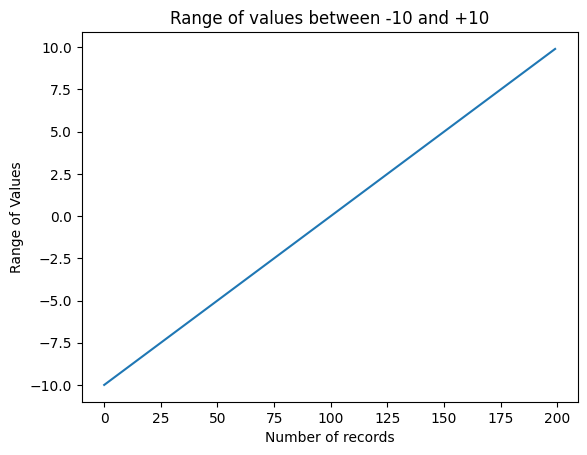

In [28]:
# Plot the numbers that were created above
# we see there are 200 numbers between -10 and 10
plt.title('Range of values between -10 and +10')
plt.plot(sample_numbers)
plt.xlabel('Number of records')
plt.ylabel('Range of Values')

In [30]:
# With ReLU, anything less than 0 will be made 0 and anything above 0 will be kept the same
# Setup a function to take care of this 
def my_relu(x: np.array) -> list:
    ''' Computes  RELU from the x '''
    return [ 0 if i <=0 else i for i in x ]

In [32]:
# Testing our function with 2 values
# One less than 0 and another greater than 0
# We see below when x is less than 0, the value returned is 0
my_relu(np.array([-10])), my_relu(np.array([0])),   my_relu(np.array([10])), 

([0], [0], [10])

In [33]:
# Running ReLU against our samples
my_relu(sample_numbers)[95:106]

[0,
 0,
 0,
 0,
 0,
 0,
 0.09999999999996412,
 0.19999999999996376,
 0.2999999999999634,
 0.39999999999996305,
 0.4999999999999627]

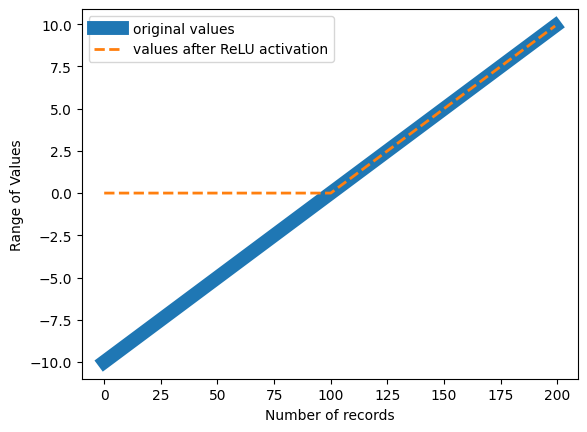

In [34]:
# Making this more visual by plotting the original numbers vs the numbers which ReLU has been applied to
# As we can see, anything below 0 has now become 0
plt.plot(sample_numbers, lw=10, label='original values')
plt.plot(my_relu(sample_numbers), lw=2, linestyle='--', label='values after ReLU activation')
plt.xlabel('Number of records')
plt.ylabel('Range of Values')
plt.legend()

In [36]:
# With that understanding of RELU activation function
# Let's compile the model
tf_clf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', \
              metrics=[tf.keras.metrics.Recall()])

In [37]:
# Train the model
# Notice I introduced the class_weight parameter here to try to reduce the imbalancing of the classes
# https://stackoverflow.com/questions/43459317/keras-class-weight-vs-sample-weights-in-the-fit-generator
tf_clf_model.fit(x=X_train, y=y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), \
          shuffle=True, class_weight={0:1, 1:500})

Epoch 1/10
2596/2596 [==============================] - 9s 3ms/step - loss: 0.5178 - recall_1: 0.0000e+00 - val_loss: 0.1513 - val_recall_1: 0.0000e+00
Epoch 2/10
2596/2596 [==============================] - 7s 3ms/step - loss: 0.4423 - recall_1: 0.0185 - val_loss: 0.1295 - val_recall_1: 0.0769
Epoch 3/10
2596/2596 [==============================] - 6s 2ms/step - loss: 0.4205 - recall_1: 0.0185 - val_loss: 0.1260 - val_recall_1: 0.0769
Epoch 4/10
2596/2596 [==============================] - 6s 2ms/step - loss: 0.3949 - recall_1: 0.0185 - val_loss: 0.1214 - val_recall_1: 0.1538
Epoch 5/10
2596/2596 [==============================] - 7s 3ms/step - loss: 0.3706 - recall_1: 0.1296 - val_loss: 0.1163 - val_recall_1: 0.1538
Epoch 6/10
2596/2596 [==============================] - 7s 3ms/step - loss: 0.3426 - recall_1: 0.2222 - val_loss: 0.1395 - val_recall_1: 0.3077
Epoch 7/10
2596/2596 [==============================] - 7s 3ms/step - loss: 0.3208 - recall_1: 0.2963 - val_loss: 0.1109 - val_r

In [38]:
# How did our model perform?
# Getting the history
print(tf_clf_model.history.history)

{'loss': [0.5178429484367371, 0.4422512948513031, 0.42047640681266785, 0.39487582445144653, 0.37055543065071106, 0.3426285982131958, 0.3208451569080353, 0.3002537786960602, 0.2808709144592285, 0.2645675539970398], 'recall_1': [0.0, 0.018518518656492233, 0.018518518656492233, 0.018518518656492233, 0.12962962687015533, 0.2222222238779068, 0.29629629850387573, 0.3333333432674408, 0.42592594027519226, 0.40740740299224854], 'val_loss': [0.1513395458459854, 0.1294926255941391, 0.12596602737903595, 0.12136714905500412, 0.11625183373689651, 0.13949763774871826, 0.11093323677778244, 0.0950491726398468, 0.06944186985492706, 0.1275871843099594], 'val_recall_1': [0.0, 0.07692307978868484, 0.07692307978868484, 0.1538461595773697, 0.1538461595773697, 0.3076923191547394, 0.3076923191547394, 0.3076923191547394, 0.3076923191547394, 0.3076923191547394]}


In [39]:
# A cleaner view for easier comparison
pd.DataFrame(tf_clf_model.history.history)

,loss,recall_1,val_loss,val_recall_1
0,0.517843,0.000000,0.151340,0.000000
1,0.442251,0.018519,0.129493,0.076923
2,0.420476,0.018519,0.125966,0.076923
3,0.394876,0.018519,0.121367,0.153846
4,0.370555,0.129630,0.116252,0.153846
5,0.342629,0.222222,0.139498,0.307692
6,0.320845,0.296296,0.110933,0.307692
7,0.300254,0.333333,0.095049,0.307692
8,0.280871,0.425926,0.069442,0.307692
9,0.264568,0.407407,0.127587,0.307692


In [41]:
# How about a much better view
# Transposing the dataframe, now we can look across all the metrics
pd.DataFrame(tf_clf_model.history.history).T

,0,1,2,3,4,5,6,7,8,9
loss,0.517843,0.442251,0.420476,0.394876,0.370555,0.342629,0.320845,0.300254,0.280871,0.264568
recall_1,0.000000,0.018519,0.018519,0.018519,0.129630,0.222222,0.296296,0.333333,0.425926,0.407407
val_loss,0.151340,0.129493,0.125966,0.121367,0.116252,0.139498,0.110933,0.095049,0.069442,0.127587
val_recall_1,0.000000,0.076923,0.076923,0.153846,0.153846,0.307692,0.307692,0.307692,0.307692,0.307692


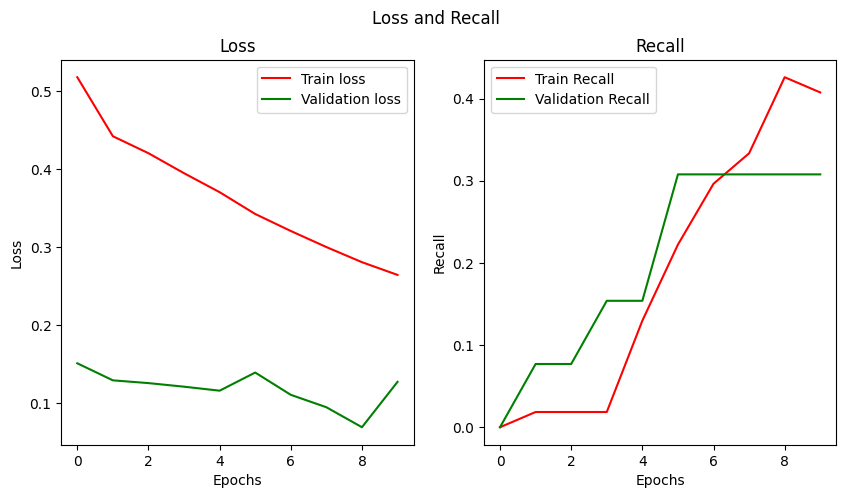

In [43]:
# Plot the loss and accuracy
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# We can see from below the loss has decreased while the accuracy has increased.
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
plt.suptitle('Loss and Recall')

ax[0].plot(tf_clf_model.history.history['loss'], 'r', tf_clf_model.history.history['val_loss'], 'g' )
ax[0].set_title('Loss')
ax[0].legend(labels=['Train loss', 'Validation loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(tf_clf_model.history.history['recall_1'], 'r', tf_clf_model.history.history['val_recall_1'], 'g' )
ax[1].set_title('Recall')
ax[1].legend(labels=['Train Recall', 'Validation Recall'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Recall')

plt.show()

In [44]:
# With the training loss trending downwards, this suggest a few more epochs may make the mode perform even better
# How did our model do for training
# import some metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, \
    precision_recall_curve, auc, classification_report, roc_curve

In [45]:
# Looking at y_true
y_test

3706409    0
2141747    0
117303     0
15089      0
24905      0
          ..
36391      0
739641     0
2987       0
3028447    0
1046305    0
Name: label, Length: 41522, dtype: int64

In [46]:
# When making the prediction, our values will be continuous such as
tf_clf_model.predict(X_test)

1298/1298 [==============================] - 2s 2ms/step


array([[0.11998063],
       [0.1144481 ],
       [0.11478651],
       ...,
       [0.11444854],
       [0.11444541],
       [0.11444263]], dtype=float32)

In [47]:
# If we try to feed this to some of our metrics algorithm, it will get a value error such as
# " Classification metrics can't handle a mix of binary and continuous targets"
# As a result, I round it out instead
np.round(tf_clf_model.predict(X_test))

1298/1298 [==============================] - 2s 2ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [48]:
# Let's save these predictions out to a variable
x_test_preds = np.round(tf_clf_model.predict(X_test))
x_test_preds

1298/1298 [==============================] - 2s 2ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [49]:
# Grabbing the accuracy score
# With that understanding above, let grab the accuracy score
accuracy_score(y_true=y_test.astype('float'), y_pred=x_test_preds)

0.9985068156639854

In [50]:
# import seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

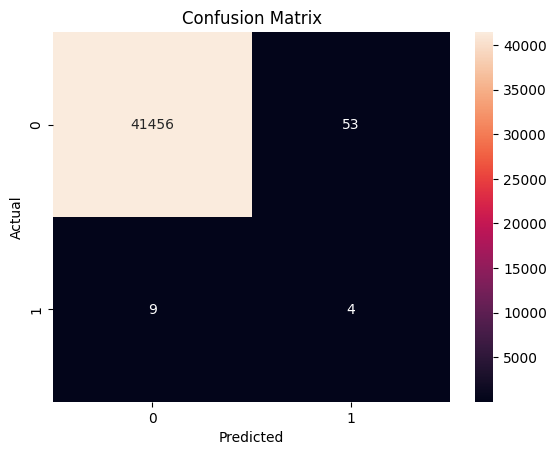

In [51]:
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test.astype('float'), y_pred=x_test_preds), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# Overall, this model is not doing too bad. Context is important!!
# This is actually a model, I would put in production for my security monitoring.
# If I am able to ignore 41,456 records and focus only on 53 (false positives) + 4 (true positives) = 57 records of concern
# Obviously, no one wants the 9 false negatives. Hopefully, we can catch those "threats" via threat hunting
# Looking at the classification report
print(classification_report(y_true=y_test.astype('float'), y_pred=x_test_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41509
         1.0       0.07      0.31      0.11        13

    accuracy                           1.00     41522
   macro avg       0.53      0.65      0.56     41522
weighted avg       1.00      1.00      1.00     41522



In [53]:
# Confirming there are only 13 records flagged as suspicious
len(list(np.where(y_test == 1))[0])

13

In [54]:
# Let's define a sample with the features values: 
# duration	orig_bytes	resp_bytes	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes
new_sample = np.array([141., 356138566,	11037090, 60, 3026679, 33, 982584], dtype=float, ndmin=2)
new_sample

array([[1.41000000e+02, 3.56138566e+08, 1.10370900e+07, 6.00000000e+01,
        3.02667900e+06, 3.30000000e+01, 9.82584000e+05]])

In [55]:
# Make a prediction on the sample
# Remember, the previously unseen data has to go through the same transformation as the training data
# See:
#   06 - Beginning Data Scaling
#   07 - Beginning Principal Component Analysis (PCA)
new_pred = tf_clf_model.predict(pca.transform(min_max_scaler.transform(new_sample)))
new_pred

1/1 [==============================] - 0s 40ms/step


array([[0.57959896]], dtype=float32)

In [56]:
# Import the data time library
from datetime import datetime

In [57]:
# Report a sample as suspicious, if it's threshold is greater than 0.5
f'{datetime.now()} - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log' if new_pred > 0.5  \
    else "[**] {datetime.now()} - Normal Traffic"

'2023-05-28 18:39:34.706679 - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log'

In [58]:
# Setup a suspicious sample
new_sample = np.array([5000., 356138566,	11037090, 60, 3026679, 33, 982584], dtype=float, ndmin=2)
new_sample

array([[5.00000000e+03, 3.56138566e+08, 1.10370900e+07, 6.00000000e+01,
        3.02667900e+06, 3.30000000e+01, 9.82584000e+05]])

In [59]:
# Transform the sample
new_pred = tf_clf_model.predict(pca.transform(min_max_scaler.transform(new_sample)))
new_pred

1/1 [==============================] - 0s 30ms/step


array([[0.99791276]], dtype=float32)

In [60]:
# Report a sample as suspicious, if it's threshold is greater than 0.5
f'{datetime.now()} - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log' if new_pred > 0.5  \
    else "[**] {datetime.now()} - Normal Traffic"

'2023-05-28 18:39:38.986373 - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log'

In [61]:
# Import the os library
import os

In [62]:
# Create the location to save the model
PATH = './SAVED_MODELS/tf_classification/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [63]:
# Save the model
tf.keras.models.save_model(model=tf_clf_model, filepath=f'{PATH}/tf_clf_model.tf', \
                           overwrite=True, save_format='tf')

INFO:tensorflow:Assets written to: ./SAVED_MODELS/tf_classification//tf_clf_model.tf\assets


INFO:tensorflow:Assets written to: ./SAVED_MODELS/tf_classification//tf_clf_model.tf\assets


In [64]:
# With the model saved, time to load it
loaded_tf_clf_model = tf.keras.models.load_model(filepath=f'{PATH}tf_clf_model.tf')
loaded_tf_clf_model

In [65]:
# Make a prediction on the loaded model
loaded_tf_clf_model.predict(pca.transform(min_max_scaler.transform(new_sample)))

1/1 [==============================] - 0s 153ms/step


array([[0.99791276]], dtype=float32)

In [66]:
# That's it! Moving on!!